In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv("./data/HDI.csv")
df2 = pd.read_csv("./data/master.csv")

In [3]:
hdi = df1.copy()
suicide = df2.copy()

In [4]:
hdi = hdi.drop(columns=['Code'])
suicide = suicide.drop(columns=['country-year'])

In [5]:
hdi.columns = [col.lower().strip().replace(' ', '_') for col in hdi.columns]

In [6]:
suicide.columns = [col.lower().strip().replace(' ', '_') for col in suicide.columns]

In [7]:
hdi.columns

Index(['entity', 'year', 'human_development_index'], dtype='object')

In [8]:
suicide.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k_pop', 'hdi_for_year', 'gdp_for_year_($)',
       'gdp_per_capita_($)', 'generation'],
      dtype='object')

In [9]:
hdi = hdi.rename(columns={'human_development_index':'hdi', 'entity':'country'})

In [10]:
suicide = suicide.rename(columns={'entity':'country', 'hdi_for_year':'hdi'})

In [11]:
print(hdi.columns, suicide.columns, sep='\n\n')

Index(['country', 'year', 'hdi'], dtype='object')

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k_pop', 'hdi', 'gdp_for_year_($)', 'gdp_per_capita_($)',
       'generation'],
      dtype='object')


In [12]:
suicide.drop(columns=['hdi'], inplace=True)

In [13]:
df_inner = pd.merge(suicide, hdi, how='inner', on=['country', 'year'])

In [14]:
df_inner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21906 entries, 0 to 21905
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             21906 non-null  object 
 1   year                21906 non-null  int64  
 2   sex                 21906 non-null  object 
 3   age                 21906 non-null  object 
 4   suicides_no         21906 non-null  int64  
 5   population          21906 non-null  int64  
 6   suicides/100k_pop   21906 non-null  float64
 7   gdp_for_year_($)    21906 non-null  object 
 8   gdp_per_capita_($)  21906 non-null  int64  
 9   generation          21906 non-null  object 
 10  hdi                 21906 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 1.8+ MB


In [106]:
df = df.rename(columns={'gdp_for_year_($)': 'gdp_for_year', 'gdp_per_capita_($)': 'gdp_per_capita'})

In [107]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k_pop', 'gdp_for_year', 'gdp_per_capita', 'generation',
       'hdi'],
      dtype='object')

In [15]:
df.country.unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'Chile',
       'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Denmark',
       'Ecuador', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France',
       'Georgia', 'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana',
       'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica',
       'Japan', 'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan',
       'Latvia', 'Lithuania', 'Luxembourg', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania',
       'Saint Lucia', 'Serbia', 'Seychelles', 'Singapore', 'Slovakia',
       'Slovenia', 'South Africa', 'Spain'

In [18]:
original_countries = suicide.country.unique()
hdi_countries = hdi.country.unique()

In [23]:
unmatched_values = set(original_countries) - set(hdi_countries) | set(hdi_countries) - set(original_countries)

In [30]:
#list(unmatched_values)

In [50]:
len(df_inner.country.unique())

90

In [52]:
len(suicide.country.unique())

101

In [44]:
hdi

,country,year,hdi
0,Afghanistan,1990,0.273
1,Afghanistan,1991,0.279
2,Afghanistan,1992,0.287
3,Afghanistan,1993,0.297
4,Afghanistan,1994,0.292
...,...,...,...
5918,Zimbabwe,2017,0.594
5919,Zimbabwe,2018,0.602
5920,Zimbabwe,2019,0.601
5921,Zimbabwe,2020,0.600


In [45]:
suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k_pop   27820 non-null  float64
 7   gdp_for_year_($)    27820 non-null  object 
 8   gdp_per_capita_($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.1+ MB


In [53]:
df_left = pd.merge(suicide, hdi, how='left', on=['country', 'year'])

In [69]:
country_year_nan = df_left[df_left.isna().any(axis=1)][['country', 'year']]

array([  nan, 0.576, 0.585, 0.595, 0.613, 0.619, 0.628, 0.635, 0.64 ,
       0.646, 0.653, 0.676, 0.687, 0.697, 0.706, 0.712, 0.724, 0.727,
       0.73 , 0.737, 0.743, 0.746, 0.747, 0.778, 0.781, 0.785])

In [78]:
import pandas as pd

# create a sample DataFrame
data = {'Country': ['USA', 'USA', 'Canada', 'Canada', 'Canada'],
        'Year': [2015, 2016, 2015, 2016, 2017],
        'Value': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)

# group the DataFrame by 'Country' and apply the mean and count functions to each group
grouped = df.groupby('Country').agg({'Value': ['mean', 'count']})

# show the resulting DataFrame
print(grouped)

        Value      
         mean count
Country            
Canada   40.0     3
USA      15.0     2


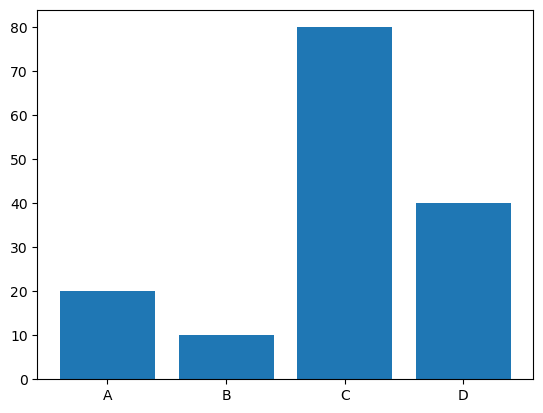

In [4]:
import matplotlib.pyplot as plt

# Create example data
x = ['A', 'B', 'C', 'D']
y = [20, 10, 80, 40]

# Plot the data as a barplot
plt.bar(x, y)

# Set the order of the x-axis values
plt.xticks([1, 0, 2, 3], ['B', 'A', 'C', 'D'])

# Show the plot
plt.show()


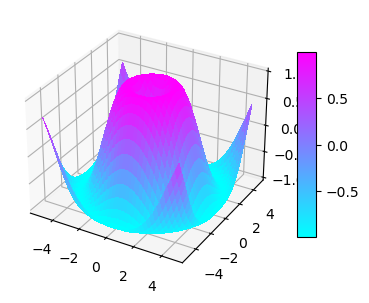

In [7]:
from mpl_toolkits.mplot3d.axes3d import get_test_data
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

# =============
# First subplot
# =============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='cool',
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)


plt.show()

## Clustering

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

C:\Users\spxph\miniconda3\envs\suicide-rate\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\spxph\miniconda3\envs\suicide-rate\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\spxph\miniconda3\envs\suicide-rate\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\spxph\miniconda3\envs\suicide-rate\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

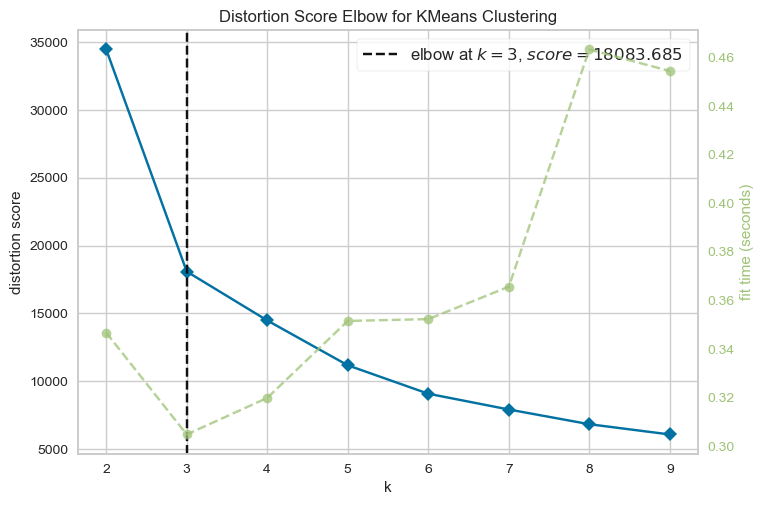

C:\Users\spxph\miniconda3\envs\suicide-rate\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


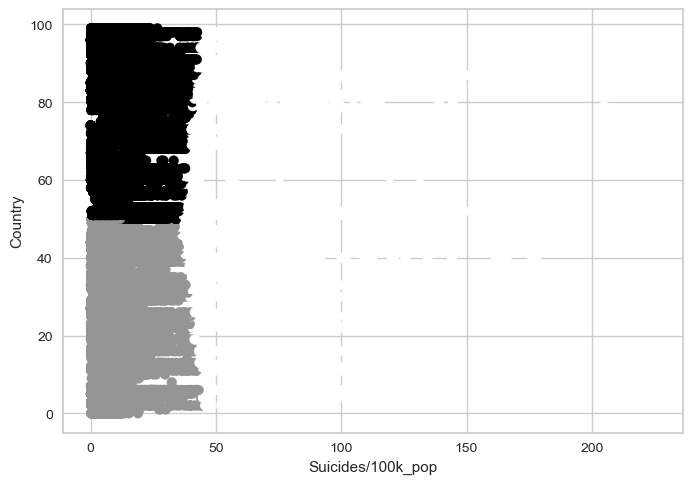

In [4]:
# Load the data
df = pd.read_csv('clusterData.csv')

# Select the relevant columns
data = df[['country', 'suicides/100k_pop']]

# Convert categorical data to numerical data (if any)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Find the optimal number of clusters
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(scaled_data)
visualizer.show()

# Fit the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_data)

# Predict the cluster labels
labels = kmeans.predict(scaled_data)

# Visualize the clusters


In [6]:
colors = {0: 'red', 1: 'blue', 2: 'green'}
colormap = [colors[label] for label in labels]

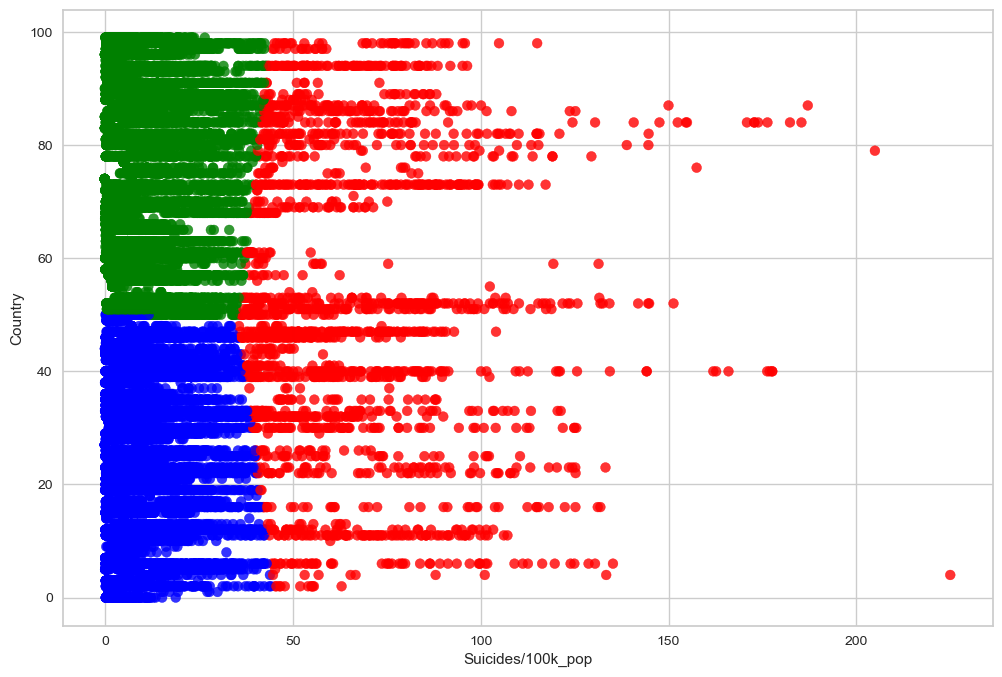

In [7]:
plt.figure(figsize=(12, 8), dpi=100)
plt.scatter(data['suicides/100k_pop'], data['country'], c=colormap, s=50, alpha=0.8)
plt.xlabel('Suicides/100k_pop')
plt.ylabel('Country')
plt.show()

In [14]:
df = pd.read_csv("clusterData.csv")
mean_suicide_rate = df.groupby('country')['suicides/100k_pop'].mean().reset_index()



In [16]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.iloc[:,1:])



C:\Users\spxph\miniconda3\envs\suicide-rate\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\spxph\miniconda3\envs\suicide-rate\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\spxph\miniconda3\envs\suicide-rate\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\spxph\miniconda3\envs\suicide-rate\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

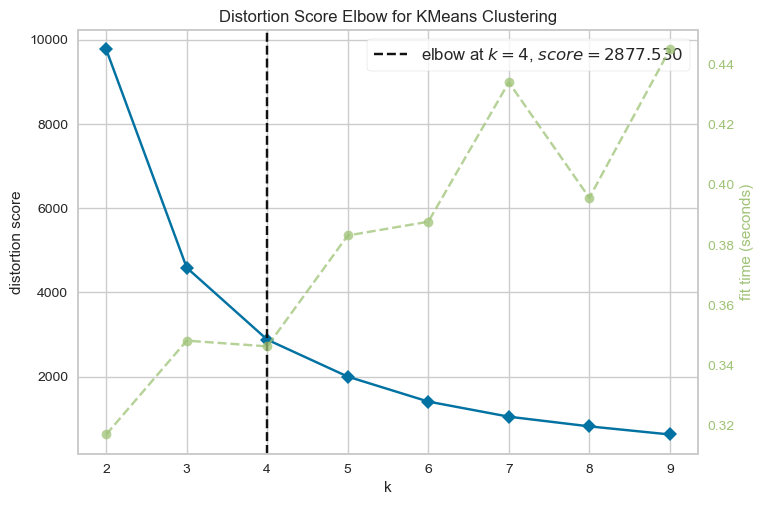

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
visualizer = KElbowVisualizer(KMeans(), k=(2,10))
visualizer.fit(scaled_data)
visualizer.show()

In [18]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_data)

C:\Users\spxph\miniconda3\envs\suicide-rate\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [22]:
labels = kmeans.predict(scaled_data)

In [24]:
colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'orange'}
colormap = [colors[label] for label in labels]

C:\Users\spxph\AppData\Local\Temp\ipykernel_5976\1319598202.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


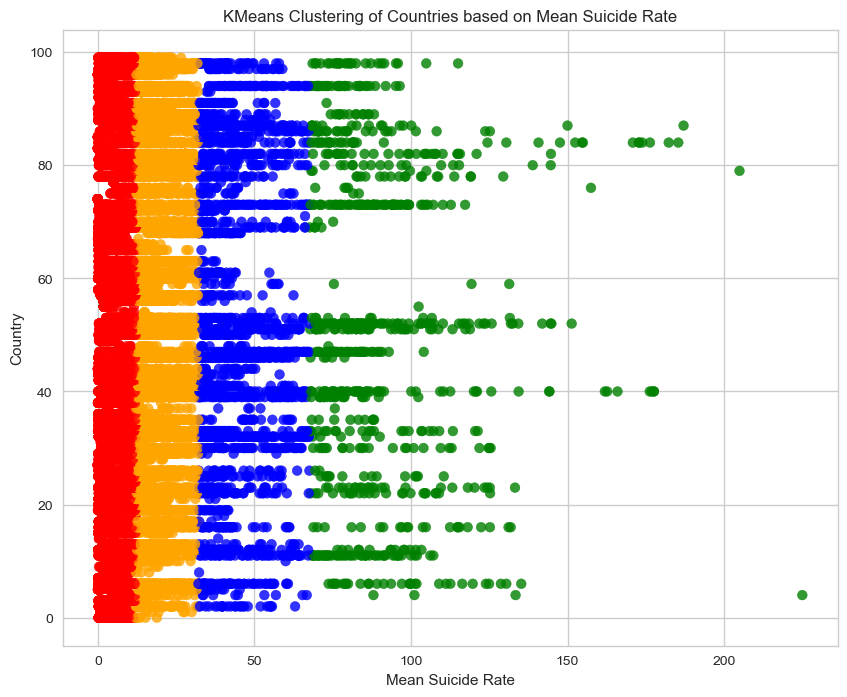

In [25]:
plt.figure(figsize=(10, 8))
plt.style.use('seaborn-whitegrid')
plt.scatter(data['suicides/100k_pop'], data['country'], c=colormap, s=50, alpha=0.8)
plt.title('KMeans Clustering of Countries based on Mean Suicide Rate')
plt.xlabel('Mean Suicide Rate')
plt.ylabel('Country')
plt.show()

In [40]:
df = pd.read_csv("clusterData.csv")

In [41]:
df['gdp_for_year'] = df['gdp_for_year'].str.replace(',','').astype('float64')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27660 entries, 0 to 27659
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27660 non-null  object 
 1   year               27660 non-null  int64  
 2   sex                27660 non-null  object 
 3   age                27660 non-null  object 
 4   suicides_no        27660 non-null  int64  
 5   population         27660 non-null  int64  
 6   suicides/100k_pop  27660 non-null  float64
 7   gdp_for_year       27660 non-null  float64
 8   gdp_per_capita     27660 non-null  int64  
 9   generation         27660 non-null  object 
 10  capital_lattitude  27660 non-null  float64
 11  capital_longitude  27660 non-null  float64
 12  continent_name     27660 non-null  object 
 13  hdi                27660 non-null  float64
dtypes: float64(5), int64(4), object(5)
memory usage: 3.0+ MB


In [46]:
means_data = df.groupby('country').mean()[['suicides/100k_pop', 'gdp_for_year']]

C:\Users\spxph\AppData\Local\Temp\ipykernel_5976\3022310700.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means_data = df.groupby('country').mean()[['suicides/100k_pop', 'gdp_for_year']]


In [44]:
import seaborn as sns

<Axes: xlabel='gdp_for_year', ylabel='suicides/100k_pop'>

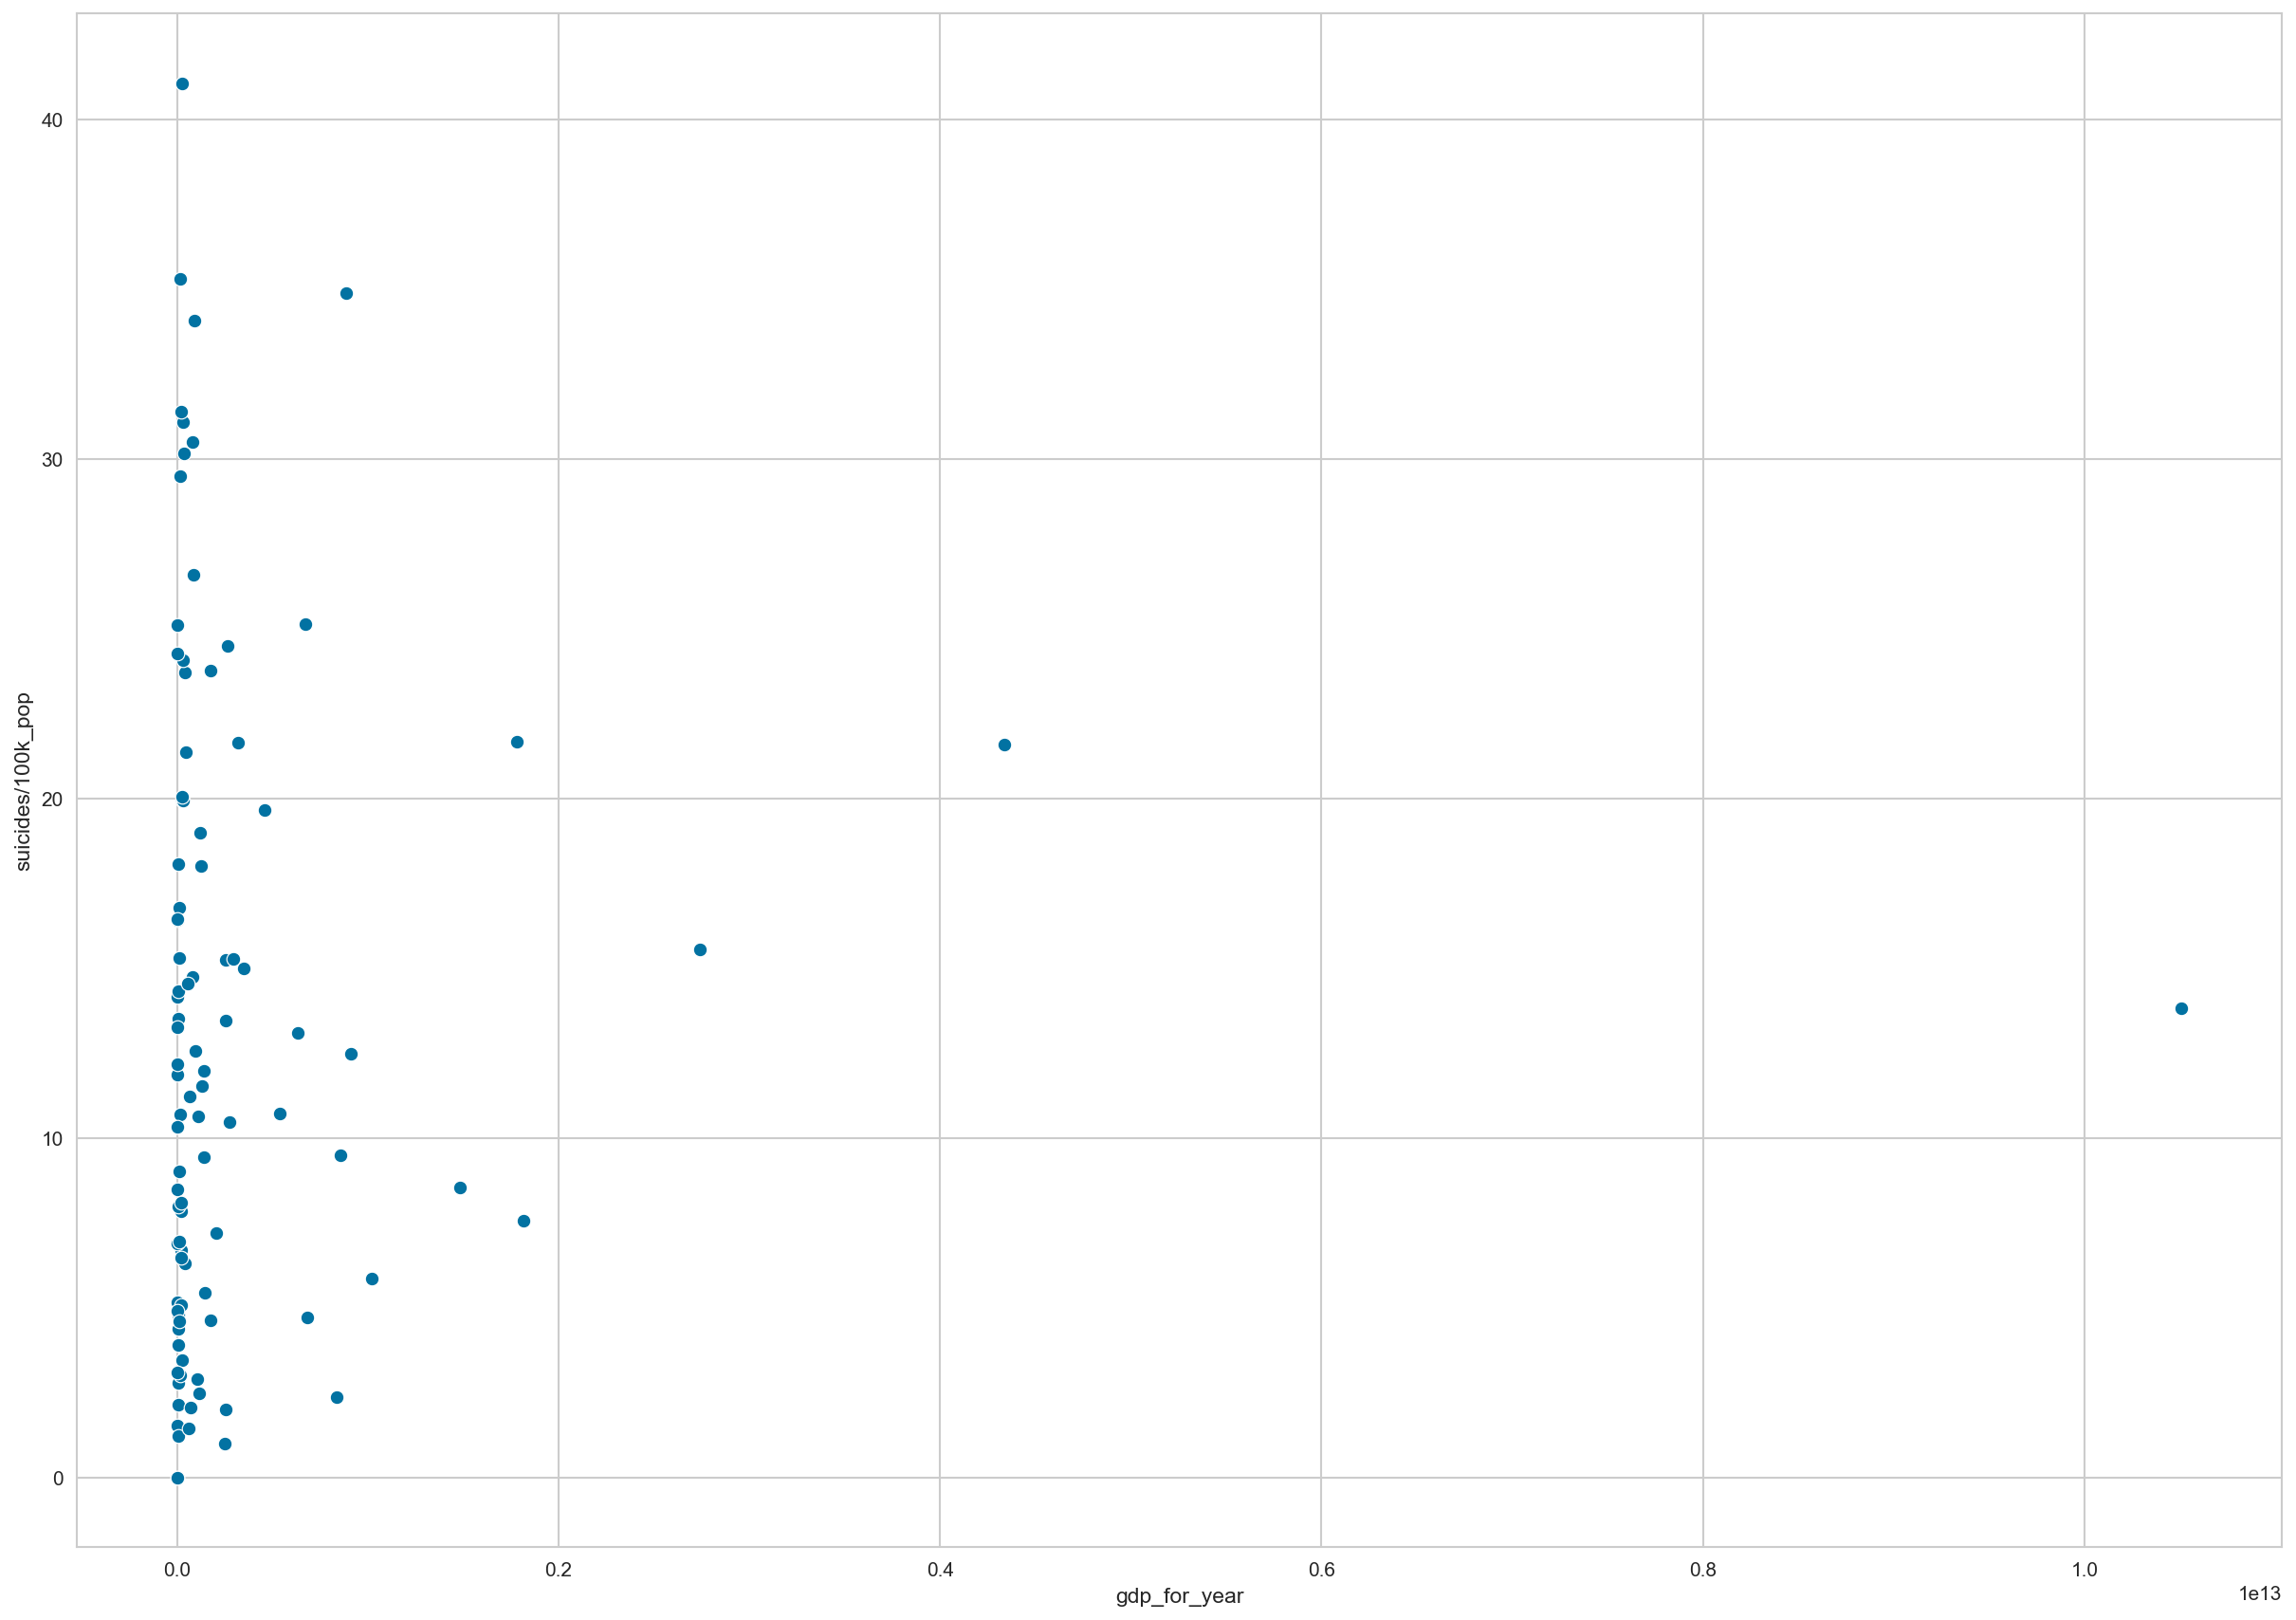

In [51]:
plt.figure(figsize=(20, 14), dpi=150)
sns.scatterplot(data=means_data, x='gdp_for_year', y='suicides/100k_pop')

In [59]:
means_data.sort_values(by='gdp_for_year', ascending=False)

,suicides/100k_pop,gdp_for_year
country,,
United States,13.819812,1.051071e+13
Japan,21.573199,4.339221e+12
Germany,15.559904,2.742233e+12
United Kingdom,7.566989,1.816067e+12
France,21.675694,1.781194e+12
...,...,...
Grenada,4.903333,5.602409e+08
Saint Vincent and the Grenadines,10.315433,4.884483e+08
Saint Kitts and Nevis,0.000000,2.160186e+08
